In [185]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [186]:
ETCGRecent_Data = Path("../Resources1/ETCGRecent_Data.csv")
GLDRecent_Data = Path("../Resources1/GLDRecent_Data.csv")
GBTCRecent_Data = Path("../Resources1/GBTCRecent_Data.csv")
SLVRecent_Data = Path("../Resources1/SLVRecent_Data.csv")
SP500Recent_Data = Path("../Resources1/SP500Recent_Data.csv")

In [187]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
ETCGRecent_Data_df = pd.read_csv(ETCGRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GLDRecent_Data_df = pd.read_csv(GLDRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GBTCRecent_Data_df = pd.read_csv(GBTCRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SLVRecent_Data_df = pd.read_csv(SLVRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500Recent_Data_df = pd.read_csv(SP500Recent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [188]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([ETCGRecent_Data_df, GLDRecent_Data_df, GBTCRecent_Data_df, SLVRecent_Data_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['ETCG', 'GLD', 'GBTC', 'SLV']

# Display a few rows
combined_df.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,18.90,152.41,12.33,17.14
2020-02-21,19.66,154.70,12.54,17.28
2020-02-24,19.50,156.09,11.72,17.40
2020-02-25,15.80,153.30,10.54,16.71
2020-02-26,15.25,153.97,10.36,16.68


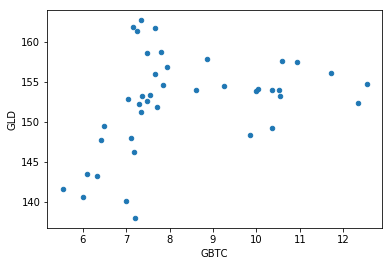

In [189]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GBTC', y='GLD')

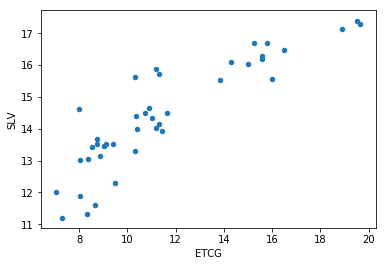

In [190]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='ETCG', y='SLV')

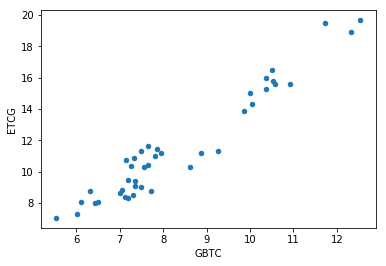

In [191]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GBTC', y='ETCG')

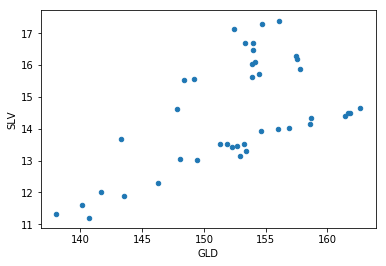

In [192]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GLD', y='SLV')

In [193]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


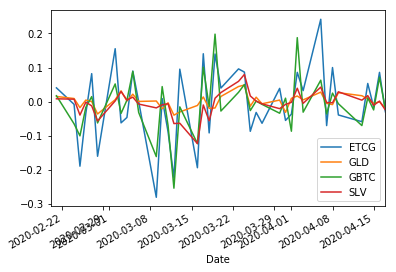

In [194]:
daily_returns.plot()

In [195]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

GLD     0.322738
SLV     0.565561
GBTC    1.292388
ETCG    1.751277
dtype: float64

In [196]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2020-02-20         NaN
2020-02-21    0.020109
2020-02-24   -0.014400
2020-02-25   -0.086989
2020-02-26   -0.012328
dtype: float64

In [197]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2020-02-20         NaN
2020-02-21    1.020109
2020-02-24    1.005420
2020-02-25    0.917959
2020-02-26    0.906643
dtype: float64

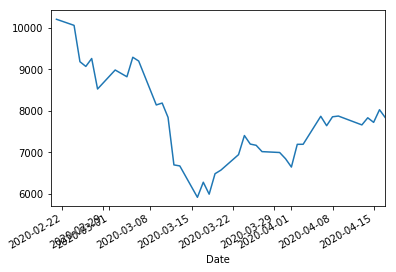

In [198]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

In [199]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [200]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,ETCG,GLD,GBTC,SLV
ETCG,1.000000,0.437394,0.799494,0.546394
GLD,0.437394,1.000000,0.316546,0.761823
GBTC,0.799494,0.316546,1.000000,0.527541
SLV,0.546394,0.761823,0.527541,1.000000


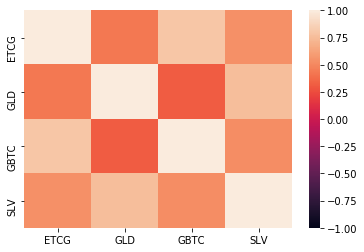

In [201]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [202]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

ETCG   -0.944460
GLD     0.930840
GBTC   -1.766607
SLV    -1.847624
dtype: float64

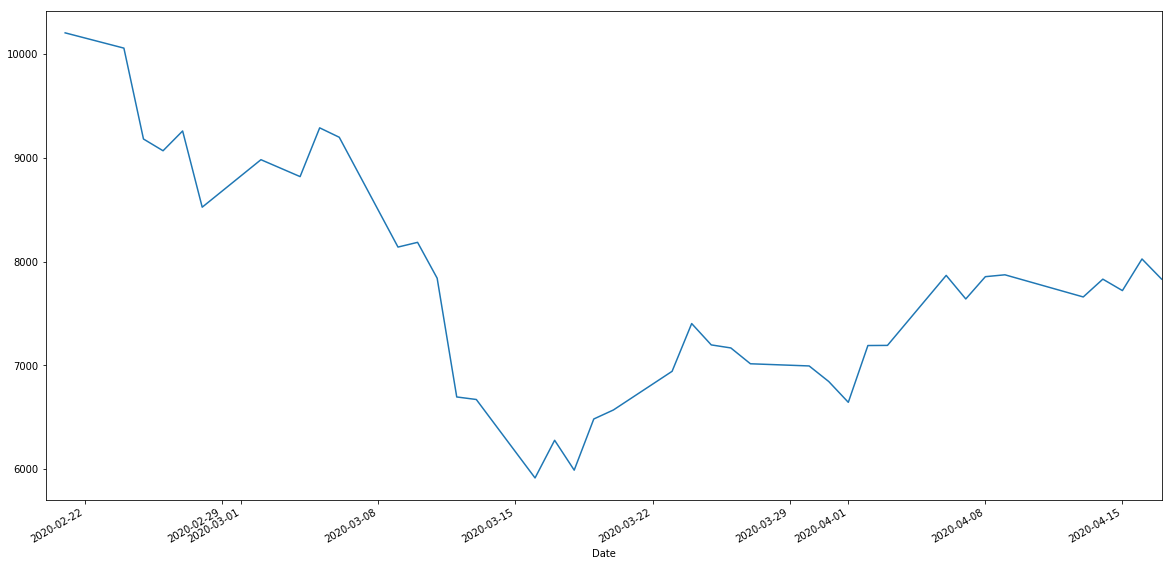

In [203]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.25, .25, .25, .25]
candidate_portfolio_returns = daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

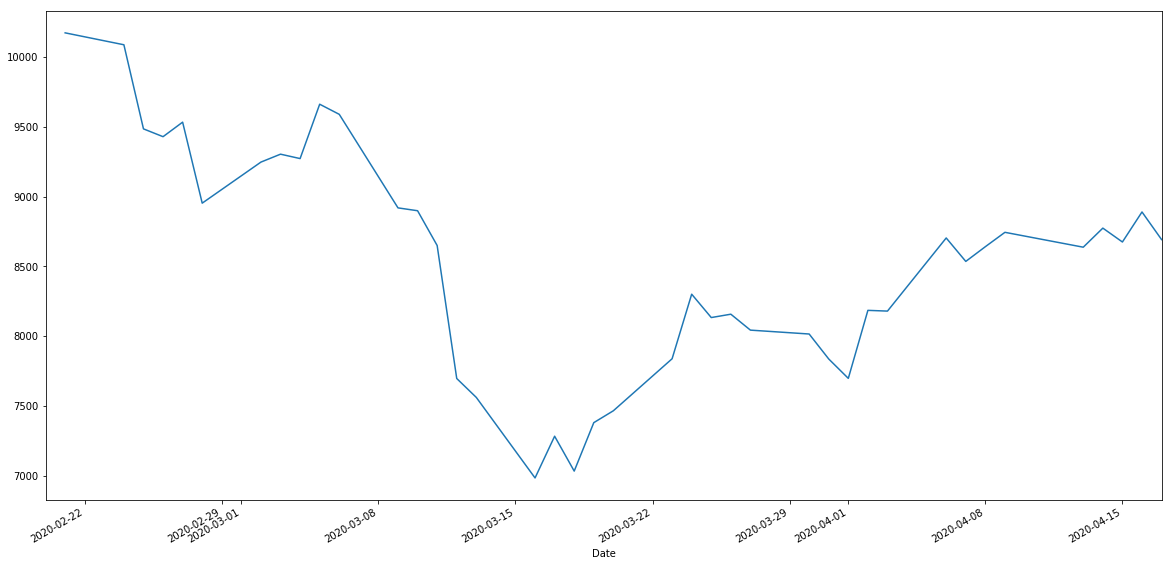

In [204]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [0.125, 0.5, 0.2, 0.175]
A_correlated_portfolio_returns = daily_returns.dot(weights)
A_correlated_cumulative_returns = (1 + A_correlated_portfolio_returns).cumprod()
A_correlated_cumulative_profits = (initial_investment * A_correlated_cumulative_returns)
A_correlated_cumulative_profits.plot(figsize=(20,10))

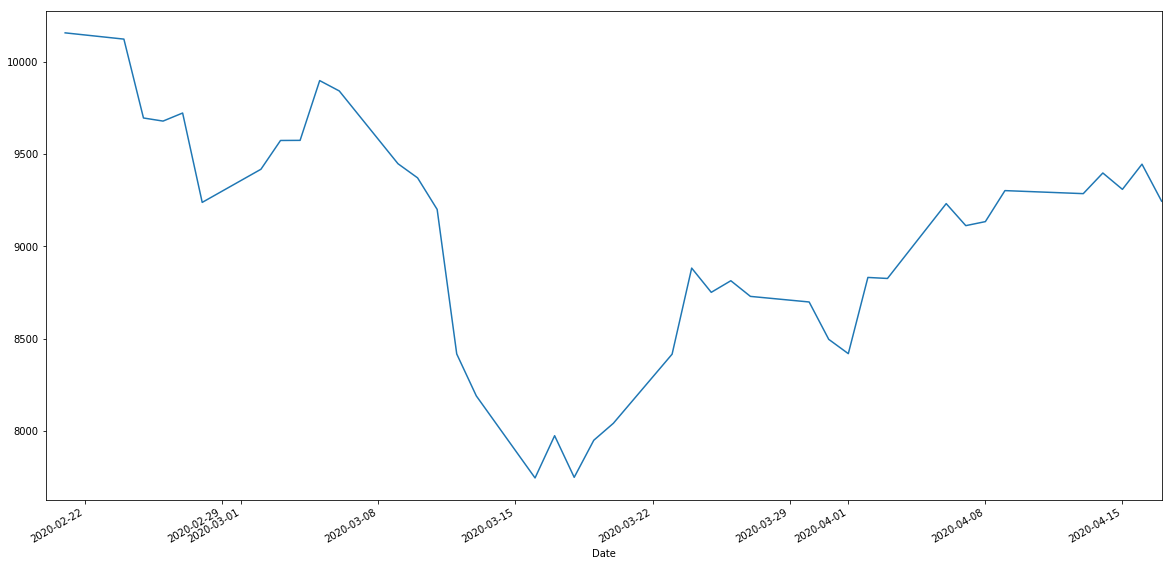

In [205]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.05, .65, .15, .15]
B_candidate_portfolio_returns = daily_returns.dot(weights)
B_candidate_cumulative_returns = (1 + B_candidate_portfolio_returns).cumprod()
B_candidate_cumulative_profits = (initial_investment * B_candidate_cumulative_returns)
B_candidate_cumulative_profits.plot(figsize=(20,10))

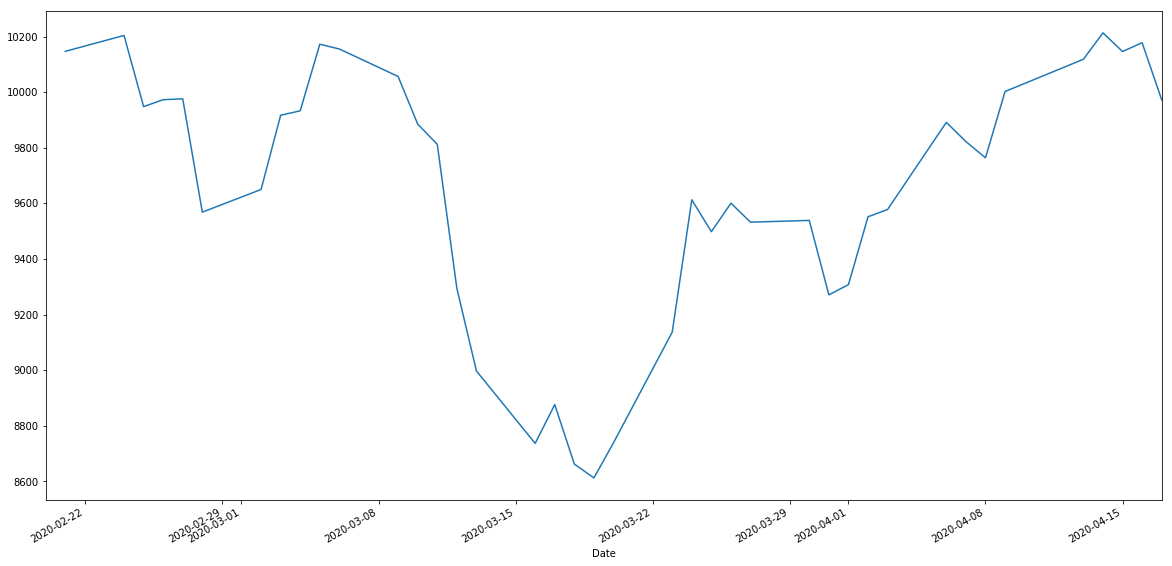

In [206]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.01, .85, .04, .1]
C_candidate_portfolio_returns = daily_returns.dot(weights)
C_candidate_cumulative_returns = (1 + C_candidate_portfolio_returns).cumprod()
C_candidate_cumulative_profits = (initial_investment * C_candidate_cumulative_returns)
C_candidate_cumulative_profits.plot(figsize=(20,10))

In [207]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df1 = pd.concat([ETCGRecent_Data_df, GBTCRecent_Data_df, GLDRecent_Data_df, SLVRecent_Data_df, SP500Recent_Data_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df1.sort_index(inplace=True)

# Display a few rows
combined_df1.head()


,Close,Close,Close,Close,Close
Date,,,,,
2020-02-20,18.90,12.33,152.41,17.14,3373.23
2020-02-21,19.66,12.54,154.70,17.28,3337.75
2020-02-24,19.50,11.72,156.09,17.40,3225.89
2020-02-25,15.80,10.54,153.30,16.71,3128.21
2020-02-26,15.25,10.36,153.97,16.68,3116.39


In [208]:
# Rename the columns to match the corresponding stock
combined_df1.columns = ['ETCG', 'GLD', 'GBTC', 'SLV', 'SP500']
combined_df1.head()

,ETCG,GLD,GBTC,SLV,SP500
Date,,,,,
2020-02-20,18.90,12.33,152.41,17.14,3373.23
2020-02-21,19.66,12.54,154.70,17.28,3337.75
2020-02-24,19.50,11.72,156.09,17.40,3225.89
2020-02-25,15.80,10.54,153.30,16.71,3128.21
2020-02-26,15.25,10.36,153.97,16.68,3116.39


In [209]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns1 = combined_df1.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [210]:
# Calculate covariance of all daily returns
GBTCcovariance = daily_returns1['GBTC'].cov(daily_returns1['SP500'])

ETCGcovariance = daily_returns1['ETCG'].cov(daily_returns1['SP500'])

SLVcovariance = daily_returns1['SLV'].cov(daily_returns1['SP500'])

GLDcovariance = daily_returns1['GLD'].cov(daily_returns1['SP500'])

In [211]:
# Calculate variance of all daily returns
ETCGvariance = daily_returns1['ETCG'].var()

GLDvariance = daily_returns1['GLD'].var()

GBTCvariance = daily_returns1['GBTC'].var()

SLVvariance = daily_returns1['SLV'].var()

In [212]:
# Calculate beta of all daily returns of all
GBTC_beta = GBTCcovariance / GBTCvariance

ETCG_beta = ETCGcovariance / ETCGvariance

GLD_beta = GLDcovariance / GLDvariance

SLV_beta = SLVcovariance / SLVvariance

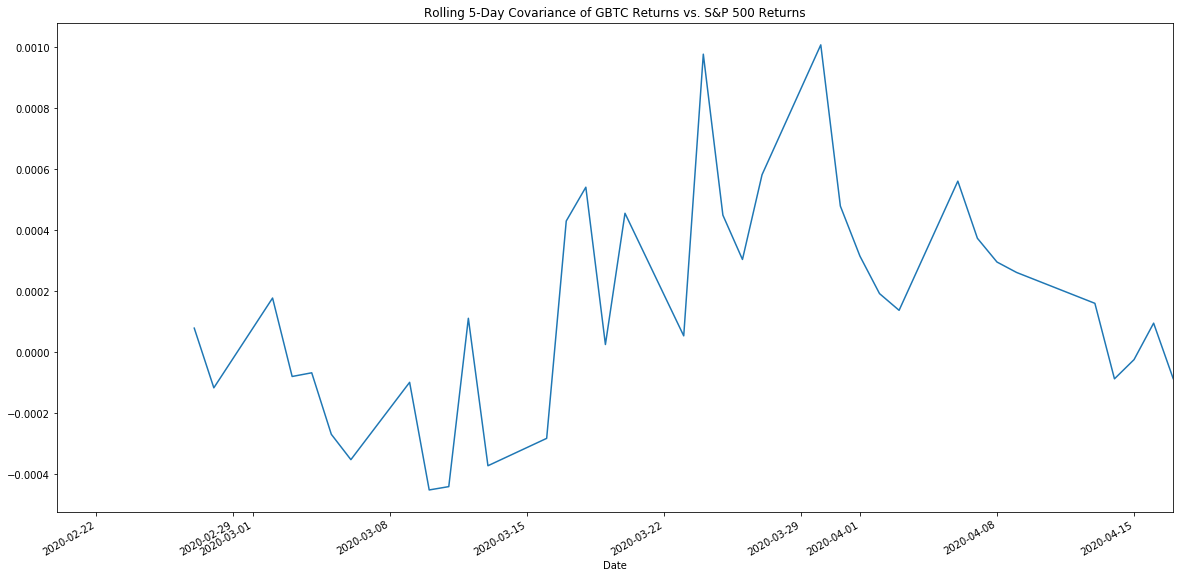

In [213]:
# Calculate 5-day rolling covariance of GBTC vs. S&P 500 and plot the data
GBTCrolling_covariance = daily_returns1['GBTC'].rolling(window=5).cov(daily_returns1['SP500'])
GBTCrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of GBTC Returns vs. S&P 500 Returns')

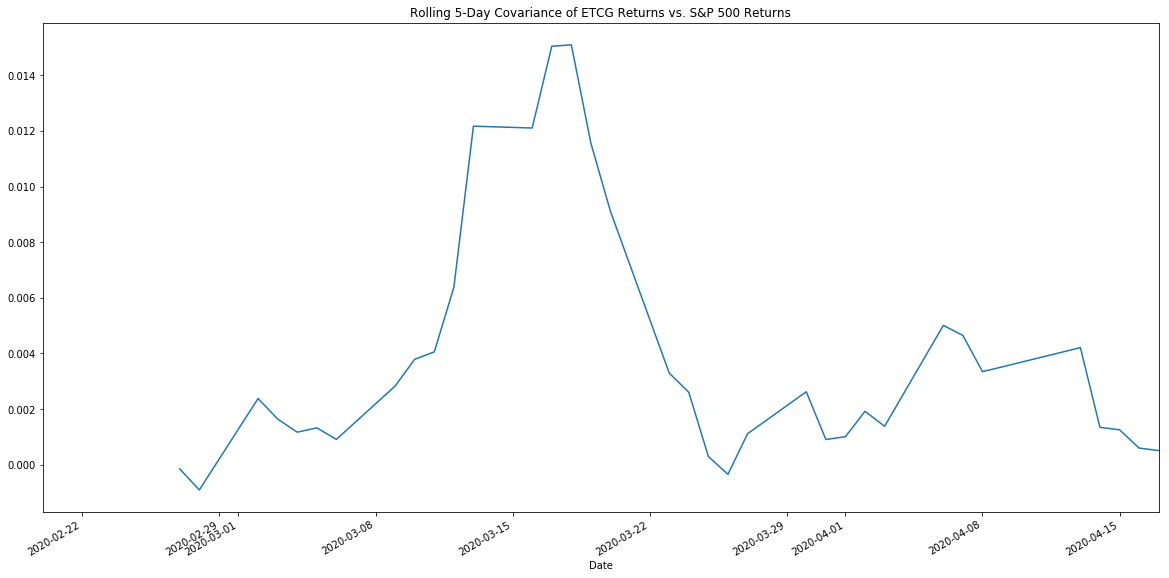

In [214]:
# Calculate 5-day rolling covariance of ETCG vs. S&P 500 and plot the data
ETCGrolling_covariance = daily_returns1['ETCG'].rolling(window=5).cov(daily_returns1['SP500'])
ETCGrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of ETCG Returns vs. S&P 500 Returns')

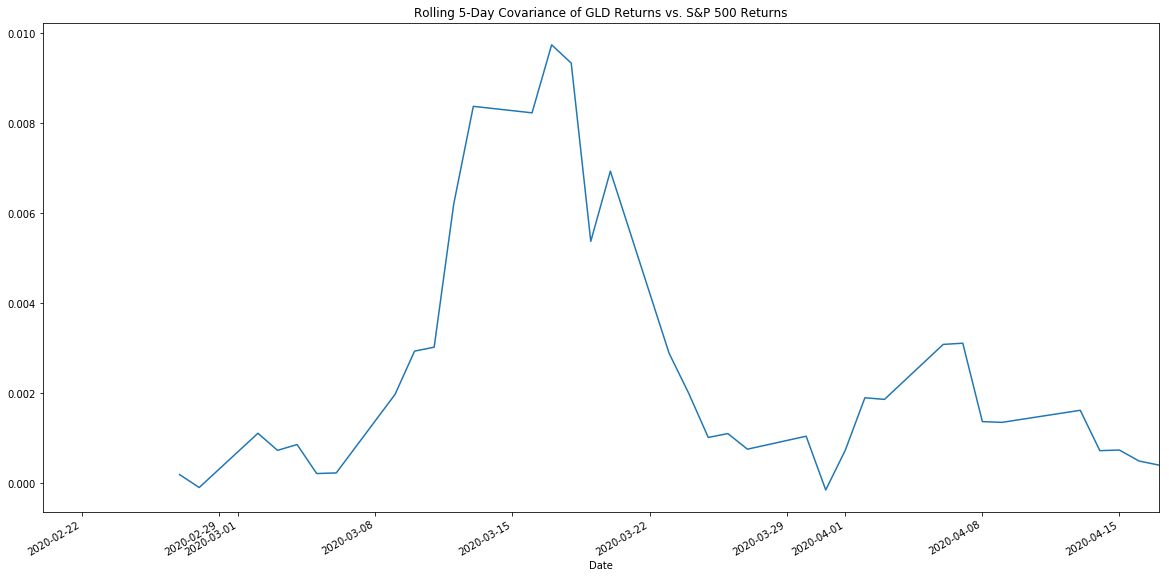

In [215]:
# Calculate 5-day rolling covariance of GLD vs. S&P 500 and plot the data
GLDrolling_covariance = daily_returns1['GLD'].rolling(window=5).cov(daily_returns1['SP500'])
GLDrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of GLD Returns vs. S&P 500 Returns')

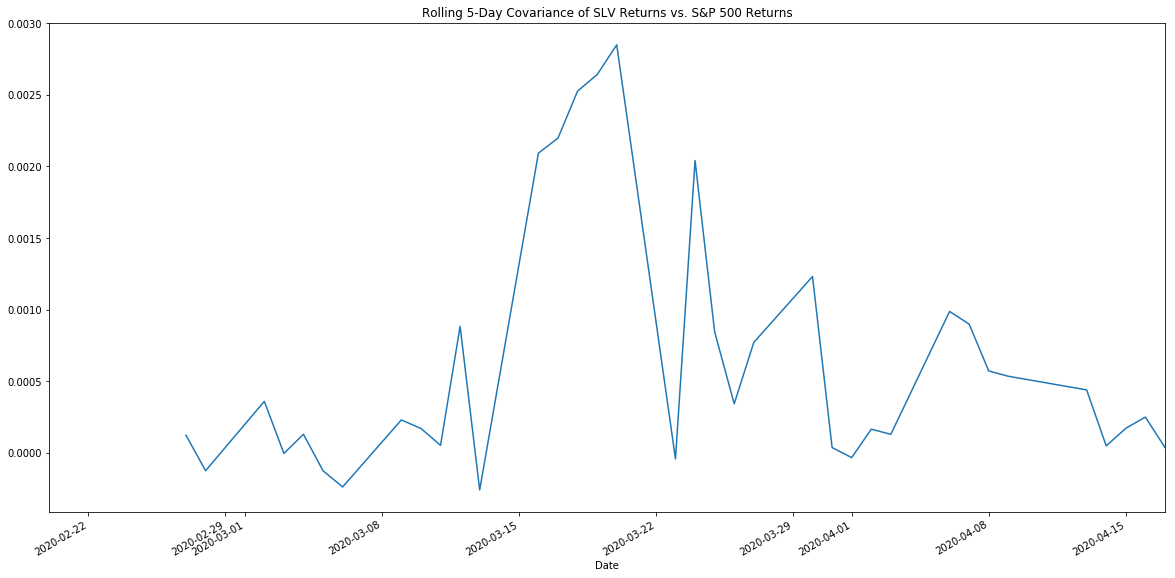

In [216]:
# Calculate 5-day rolling covariance of SLV vs. S&P 500 and plot the data
SLVrolling_covariance = daily_returns1['SLV'].rolling(window=5).cov(daily_returns1['SP500'])
SLVrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of SLV Returns vs. S&P 500 Returns')

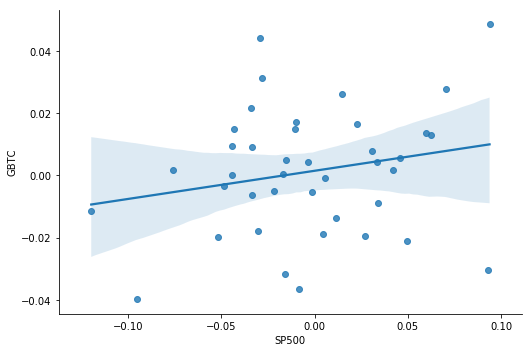

In [217]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='GBTC', data=daily_returns1, aspect=1.5, fit_reg=True)

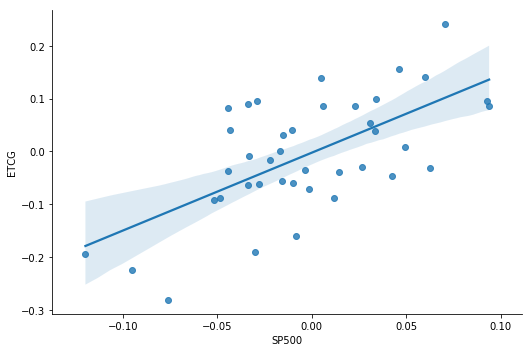

In [218]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='ETCG', data=daily_returns1, aspect=1.5, fit_reg=True)

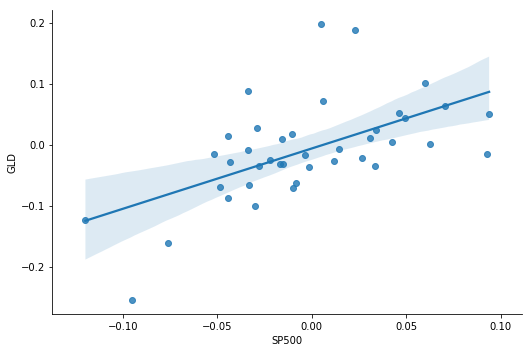

In [219]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='GLD', data=daily_returns1, aspect=1.5, fit_reg=True)

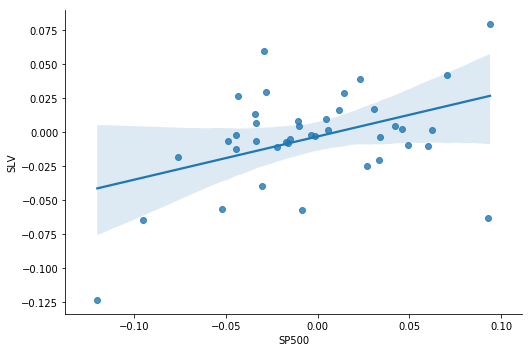

In [220]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='SLV', data=daily_returns1, aspect=1.5, fit_reg=True)

In [221]:
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [222]:
avg_daily_return = daily_returns.mean()
avg_daily_return

ETCG   -0.006564
GLD     0.001192
GBTC   -0.009060
SLV    -0.004147
dtype: float64

In [223]:
std_dev_daily_return = daily_returns.std()
std_dev_daily_return

ETCG    0.110320
GLD     0.020331
GBTC    0.081413
SLV     0.035627
dtype: float64

In [224]:
# Set number of trading days and get last closing price of stocks from DataFrame
num_trading_days = 100
num_simulations = 1000
GLD_last_price = combined_df['GLD'][-1]
GBTC_last_price = combined_df['GBTC'][-1]
ETCG_last_price = combined_df['ETCG'][-1]
SLV_last_price = combined_df['SLV'][-1]

# Initialize the simulated prices list with the last closing price of stocks
simulated_GLD_prices = [GLD_last_price]
simulated_GBTC_prices = [GBTC_last_price]
simulated_ETCG_prices = [ETCG_last_price]
simulated_SLV_prices = [SLV_last_price]

# Simulate the returns for 100 trading days
for i in range(num_trading_days):
    # Calculate the simulated price using the last price within the list then append
    GLD_simulated_price = simulated_GLD_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    simulated_GLD_prices.append(GLD_simulated_price)
    
    GBTC_simulated_price = simulated_GBTC_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    simulated_GBTC_prices.append(GBTC_simulated_price)
    
    ETCG_simulated_price = simulated_ETCG_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    simulated_ETCG_prices.append(ETCG_simulated_price)
    
    SLV_simulated_price = simulated_SLV_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
    simulated_SLV_prices.append(SLV_simulated_price)
       
# Create a DataFrame of the simulated prices
simulated_price_df = pd.DataFrame({
    "Simulated GLD Prices": simulated_GLD_prices,
    "Simulated GBTC Prices": simulated_GBTC_prices,
    "Simulated ETCG Prices": simulated_ETCG_prices,
    "Simulated SLV Prices": simulated_SLV_prices
})

# Print head of DataFrame
simulated_price_df.head()

,Simulated GLD Prices,Simulated GBTC Prices,Simulated ETCG Prices,Simulated SLV Prices
0,158.57,7.49,11.3,14.15
1,"[146.59016779751727, 163.31972979137467, 167.0...","[5.970605452656166, 7.27295223960169, 6.249215...","[11.725905688863923, 11.28916986639828, 10.534...","[12.771995287646448, 14.030001794842072, 12.82..."
2,"[175.6038068612661, 165.44598918232015, 166.80...","[6.481717812820428, 7.295389769888401, 6.54990...","[12.506292912709256, 11.521995237746065, 8.417...","[11.526045985827075, 13.589920058313531, 10.73..."
3,"[173.4629174421613, 162.18134711517936, 179.89...","[5.660378598565378, 7.176964163139982, 6.63181...","[14.16941108310942, 11.629816088658842, 9.2992...","[11.579666222237266, 13.581639162294708, 10.20..."
4,"[163.22813300939998, 163.92324272224621, 152.7...","[6.0154047300778375, 7.076807315499843, 7.1897...","[13.503347928516808, 11.926408790427988, 9.376...","[9.059612403680067, 13.433125273272921, 10.516..."


In [225]:
lastGLD = simulated_price_df['Simulated GLD Prices'][100]
lastGLD

array([  7.05791418, 132.16390326,  32.68594994, 109.33431695])

In [226]:
simulated_price_df.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
# Use the `pct_change` function to calculate daily returns of simulated stock prices 
simulated_daily_returns = simulated_price_df.pct_change()
simulated_daily_returns.head()

In [ ]:
# Use the `cumprod` function to calculate the cumulative returns of simulated stock prices
simulated_cumulative_returns = (1 + simulated_daily_returns).cumprod()
simulated_cumulative_returns.head()

In [ ]:
# Multiply an initial investment by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
initial_investment = 10000
cumulative_pnl = initial_investment * simulated_cumulative_returns
cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the cumulative profits/losses
cumulative_pnl.plot()